In [ ]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import os

Step 1: Data Load

objective: Load images and labels from the dataset dictonry
explanation:
.We load all images from subfolders
.Resize all images to (64,54) for uniformally
.Store images in X and corresponding labels in Y


In [ ]:
data_dir = "/content/drive/MyDrive/Day1 python/Plant Diseases"
categories = os.listdir(data_dir)

images = []
labels = []

for category in categories:
    folder_path = os.path.join(data_dir, category)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img)
            labels.append(category)

X = np.array(images)
y = np.array(labels)

print("Labels:",np.unique(y))
print(" Data shape:",X.shape)

Labels: ['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']
 Data shape: (1080, 64, 64, 3)


Step 2: Data Description

Explanation:
. We count how many images are in each row


Class Destribution
Potato___Late_blight             620
Potato___healthy                 120
Pepper__bell___healthy           120
Potato___Early_blight            110
Pepper__bell___Bacterial_spot    110
Name: count, dtype: int64


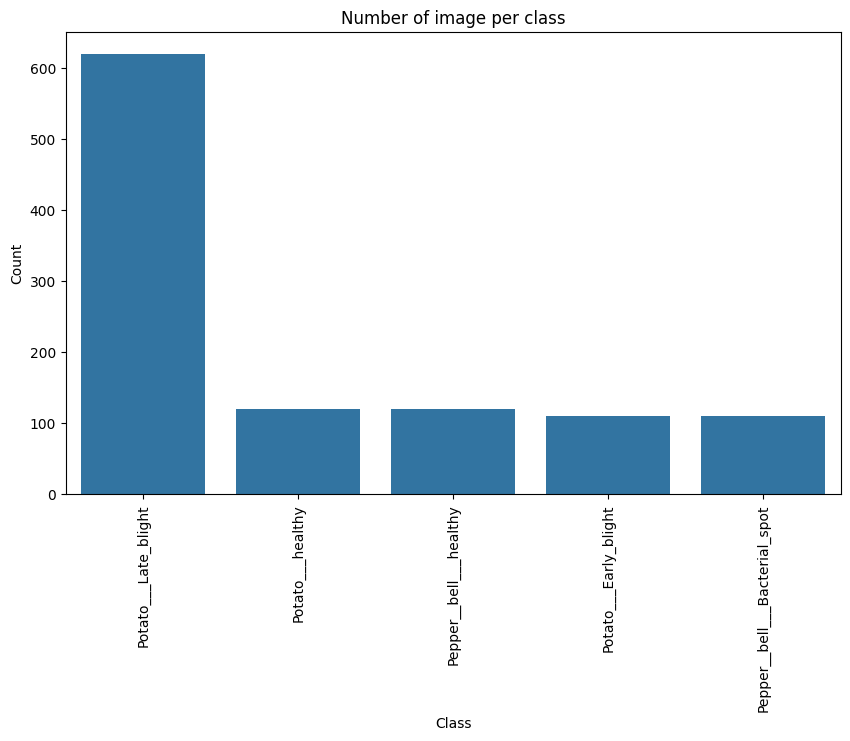

In [ ]:
# count images per class
Class_counts = pd.Series(labels).value_counts()
print("Class Destribution")
print(Class_counts)

#plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=Class_counts.index, y=Class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of image per class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Step 3: Data Clearing
Explanation:
. Ensure all images are valid and of the same shape
. Remove corrupted or misshapen images

In [ ]:
# remove corrupted images(if any)
valid_images=[]
valid_labels=[]

for img,label in zip(X,y):
    if img.shape==(64,64,3):
        valid_images.append(img)
        valid_labels.append(label)
X=np.array(valid_images)
y=np.array(valid_labels)
print("classed data shape:",X.shape)

classed data shape: (1080, 64, 64, 3)


step 4: Data Maniplutaion

Explanation:
.LabelEncoded() converts string labels like 'Apple__scab'to numeric values (eg.0,1,2)
.class_names stores original labels for later interprition


In [ ]:
#Encoded labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Save class names for later use
class_names = le.classes_
print(y_encoded)

[4 4 4 ... 0 0 0]


Step 5: Visulization


Explantion:
.Display 9 random images from the dataset
.helps visually inspect the difference between classes  

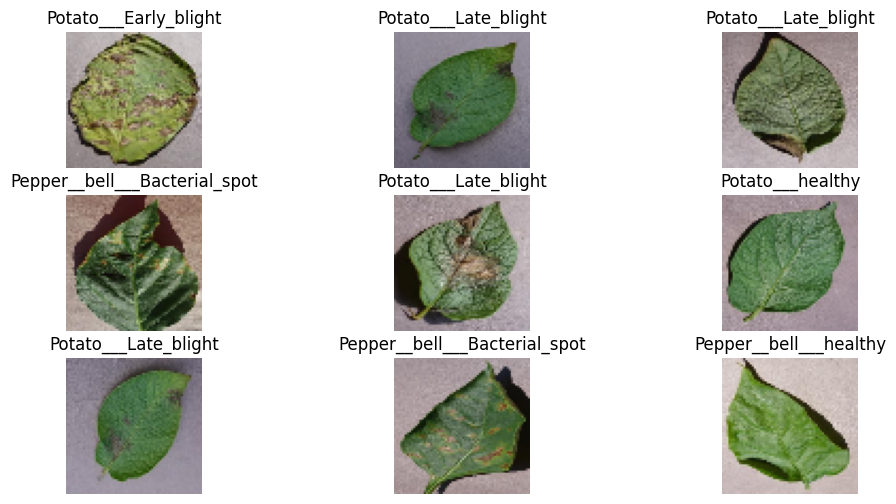

In [ ]:
# Show sample images
import random

plt.figure(figsize=(12, 6))
for i in range(9):
    idx=random.randint(0,len(X)-1)
    plt.subplot(3,3,i+1)
    plt.imshow (cv2.cvtColor(X[idx],cv2.COLOR_BGR2RGB))
    plt.title(class_names[y_encoded[idx]])
    plt.axis('off')
    label=y[idx]
    random_idx = random.randint(0, len(X) - 1)

Step 6: Feature engineering (color histogram)

Explanation:
.convert each image to HSV color space
.computer 30 histogram(Hue,Satuartion,Value)
.Normalize and flattens histogram to use as feature

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

hist_features=[extract_color_histogram(img)for img in X]
x_features=np.array(hist_features)

Step 7: Model selection:Logistic Regression/SVM

Explanation:
.SVM(Support Vector Machine) is good for high-deminasional data like histogram
.kernel='rbf'-Radial Basis Funcation kernal
.c=10- regulazation parameter
.gamma='scale'-kernal ceofficient


In [ ]:
# Choose model
#model = LogisticRegression(max_iter-1000)
model = SVC(kernel='rbf',gamma='scale')

Step 8: Training the Model

Explanation:
.train_test_split:Split data into 80% train,20%test
.model.fit:Train the model
.model.predict:predicts on test data

In [ ]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(x_features, y_encoded, test_size=0.2, random_state=42)



# Train  model
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

Step 9: Model Evalution

Explantion:
.confusion_matrix

Accuracy: 0.9027777777777778
F1 Score: 0.9013958152132294


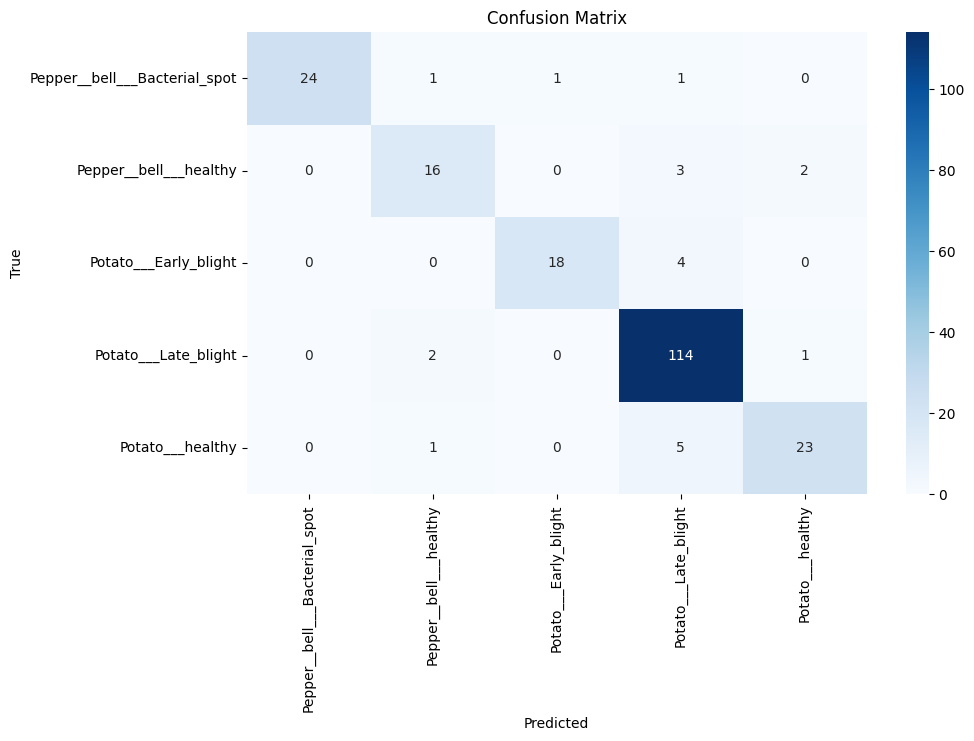

Classification Report:
                                precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       1.00      0.89      0.94        27
       Pepper__bell___healthy       0.80      0.76      0.78        21
        Potato___Early_blight       0.95      0.82      0.88        22
         Potato___Late_blight       0.90      0.97      0.93       117
             Potato___healthy       0.88      0.79      0.84        29

                     accuracy                           0.90       216
                    macro avg       0.91      0.85      0.87       216
                 weighted avg       0.90      0.90      0.90       216



In [ ]:
from sklearn.metrics import accuracy_score,f1_score ,confusion_matrix, classification_report
#accuracy
acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)


f1 = f1_score(y_test,y_pred, average='weighted')
print("F1 Score:",f1)

#confusion matrix
cm = confusion_matrix(y_test,y_pred)

#plot confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#classification report
cr = classification_report(y_test,y_pred,target_names=class_names)
print("Classification Report:\n",cr)